## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import os
import requests
import pickle
from tqdm import tqdm
import seaborn as sns

In [2]:
# ignore all future warnings
from warnings import simplefilter
simplefilter(action='ignore')

In [3]:
INPUT_MAESTRO_DATA = "data/MAESTRO-d6178bdd-identified_variants_merged_protein_regions-main.tsv"
if not os.path.exists(INPUT_MAESTRO_DATA):
    url = "https://usc1.contabostorage.com/204f7a0279064a8db2dffa42d3e58bf6:general/ucsd/MAESTRO-d6178bdd-identified_variants_merged_protein_regions-main.tsv"
    r = requests.get(url, allow_redirects=True)
    if not os.path.exists("data"):
      os.makedirs("data")
    with open(INPUT_MAESTRO_DATA, 'wb') as f:
        f.write(r.content)
variants = pd.read_csv(INPUT_MAESTRO_DATA, sep='\t', low_memory=False)
variants

,rowid,ccms_row_id,Algorithm,Filename,Cluster_index,Peptide,Unmodified_sequence,Charge,_dyn_#Intensity_for_cluster,_dyn_#Intensity_for_unmodified_sequence,...,PSP_site_match,DrugBank_drugs,Parent_mass,Num_PSP_Drugbank_events,Start_AA_1_based,End_AA_1_based,Num_spectra_for_cluster,Num_spectra_for_unmodified_sequence,Num_spectra_for_peptide_variant,Internal_ref_orig_intensity
0,1,1,.MODA.,specs_ms.mgf,960991,"K.[304.207]GARLIPEMDQIFTEVEMTTLE(K,304.207).V",.GARLIPEMDQIFTEVEMTTLEK.,4,36.905893,36.905893,...,NaN,NaN,1580.81,0,NaN,NaN,1,1,1,8.204159e+03
1,2,2,.MODA.,specs_ms.mgf,763982,"I.[304.207]FTEVEMTTLE(K,304.207).V",.FTEVEMTTLEK.,3,11.686782,11.686782,...,NaN,NaN,1934.91,0,NaN,NaN,1,2,2,4.936894e+05
2,3,3,.MSGFPLUS.,specs_ms.mgf,902201,K.[304.207]LYQPEYQEVSTEEQR.E,.LYQPEYQEVSTEEQR.,3,15.690234,15.690234,...,NaN,NaN,2203.09,0,NaN,NaN,5,6,6,1.951566e+05
3,4,4,.MSGFPLUS.,specs_ms.mgf,935503,"K.[304.207]AANSLEAFIFETQD(K,304.207).L",.AANSLEAFIFETQDK.,3,15.016824,15.016824,...,NaN,NaN,2292.24,0,NaN,NaN,3,4,4,2.877781e+06
4,5,5,.MODA.,specs_ms.mgf,297961,"R.[304.207]YSHDF(N,-56.985)FH.I",.YSHDFNFH.,3,33.768015,33.768015,...,NaN,NaN,1313.66,0,NaN,NaN,3,3,3,7.088440e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101456,101457,101457,.MODA.,specs_ms.mgf,480358,"K.[304.207]YLGE(E,-68.078)YV(K,304.207).A",.YLGEEYVK.,3,15.671927,14.867811,...,NaN,|Cisplatin|Isoflurophate|Iron Dextran|Bismuth ...,1027.56,1,NaN,NaN,2,1072,2,2.338236e+04
101457,101458,101458,.MODA.,specs_ms.mgf,237950,"K.[304.207]YL(G,55.921)EEYV(K,304.207).A",.YLGEEYVK.,4,13.932377,14.867811,...,NaN,|Cisplatin|Isoflurophate|Iron Dextran|Bismuth ...,1664.83,1,NaN,NaN,2,1072,2,5.700355e+04
101458,101459,101459,.MODA.,specs_ms.mgf,1037953,"K.{187.018}[304.207]YLGEEYV(K,304.207).A",.YLGEEYVK.,2,14.412538,14.867811,...,NaN,|Cisplatin|Isoflurophate|Iron Dextran|Bismuth ...,1795.93,1,NaN,NaN,3,1072,3,3.027917e+05
101459,101460,101460,.MODA.,specs_ms.mgf,1022758,"R.[304.207]NTYE(K,361.237)YLGEEYV(K,304.207).A",.NTYEKYLGEEYVK.,3,13.872686,22.237222,...,NaN,|Cisplatin|Isoflurophate|Iron Dextran|Bismuth ...,2605.44,1,NaN,NaN,5,17,8,9.954486e+04


In [4]:
# preprocessing
variants_processed = variants[['Peptide'] + [c for c in variants.columns if 'intensity_for_peptide_variant' in c]]
variants_processed.replace(0.0, np.nan, inplace=True)
variants_processed = variants_processed.set_index('Peptide')
variants_processed = variants_processed.T
variants_processed


Peptide,"K.[304.207]GARLIPEMDQIFTEVEMTTLE(K,304.207).V","I.[304.207]FTEVEMTTLE(K,304.207).V",K.[304.207]LYQPEYQEVSTEEQR.E,"K.[304.207]AANSLEAFIFETQD(K,304.207).L","R.[304.207]YSHDF(N,-56.985)FH.I","R.[304.207](P,143.096)SV(C,57.021)REAGPQAHMQQVTSSL(K,304.207).G",K.[304.207]QGSTGEEFHFQTGGR.D,"K.[304.207]HGTDDGVVW(M,15.995)NW(K,304.207).G","K.[304.207](H,100.027)GTDDGVVWMNW(K,304.207).G","K.[304.207]H(G,304.213)TDDGVVWMNW(K,304.207).G",...,"K.[304.207]YLGEE(Y,-21.617)V(K,304.207).A","K.[304.207]YLGEE(Y,-57.005)V(K,304.207).A","K.[304.207]YLGEE(Y,-58.064)V(K,304.207).A","K.[304.207]YLGEE(Y,-60.599)V(K,304.207).A","K.[304.207]YLGEE(Y,-63.608)V(K,304.207).A","K.[304.207]YLGE(E,-68.078)YV(K,304.207).A","K.[304.207]YL(G,55.921)EEYV(K,304.207).A","K.{187.018}[304.207]YLGEEYV(K,304.207).A","R.[304.207]NTYE(K,361.237)YLGEEYV(K,304.207).A","K.[304.207]YLGE(E,125.898)YV(K,304.207).A"
_dyn_#Empty.Empty.Empty..Empty.1_intensity_for_peptide_variant,2.459416,0.961707,0.326271,0.878024,0.170619,0.570221,0.574879,0.914939,0.649916,0.017884,...,0.521673,0.240862,0.787867,1.144694,0.929711,1.007395,0.353838,0.302468,0.735814,1.068300
_dyn_#Healthy.HC1.Healthy..HC1.1_intensity_for_peptide_variant,NaN,NaN,0.935916,NaN,NaN,NaN,NaN,NaN,NaN,0.288821,...,NaN,1.958825,NaN,NaN,1.174198,NaN,NaN,NaN,0.370040,NaN
_dyn_#Healthy.HC10.Healthy..HC10.1_intensity_for_peptide_variant,6.645649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026024,...,NaN,2.544654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_dyn_#Healthy.HC12.Healthy..HC12.1_intensity_for_peptide_variant,3.391896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009033,...,NaN,0.913199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_dyn_#Healthy.HC13.Healthy..HC13.1_intensity_for_peptide_variant,1.919552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028415,...,NaN,1.035449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_dyn_#Symptomatic-non-COVID-19.JBDZ6.Symptomatic-non-COVID-19..JBDZ6.1_intensity_for_peptide_variant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.622780,0.613630,0.020799,...,NaN,0.189781,NaN,NaN,NaN,NaN,NaN,0.143696,NaN,0.118712
_dyn_#Symptomatic-non-COVID-19.JBDZ7.Symptomatic-non-COVID-19..JBDZ7.1_intensity_for_peptide_variant,NaN,0.435434,0.200232,NaN,NaN,NaN,NaN,NaN,NaN,0.061746,...,NaN,0.247039,0.298399,NaN,NaN,0.670534,0.304344,NaN,NaN,NaN
_dyn_#Symptomatic-non-COVID-19.JBDZ8.Symptomatic-non-COVID-19..JBDZ8.1_intensity_for_peptide_variant,NaN,0.736280,0.170478,NaN,NaN,NaN,NaN,NaN,NaN,0.074855,...,NaN,0.246862,0.192796,NaN,NaN,1.330314,0.532133,NaN,NaN,NaN
_dyn_#Symptomatic-non-COVID-19.JBDZ9.Symptomatic-non-COVID-19..JBDZ9.1_intensity_for_peptide_variant,NaN,0.796550,0.197400,NaN,NaN,NaN,NaN,NaN,NaN,0.053722,...,NaN,0.296288,0.335600,NaN,NaN,1.204776,0.549213,NaN,NaN,NaN


In [5]:
variants_processed.index = variants_processed.index.map(lambda x: '.'.join(x.split('.')[:2]))
# set condition to COVID and Non-COIVD based on their index
variants_processed['Condition'] = variants_processed.index.map(lambda x: 'COVID' if 'COVID-19' in x else 'Non-COVID')
variants_processed['Condition']
# variants_processed = variants_processed[(variants_processed.Condition == "Sever")]

_dyn_#Empty.Empty                                    Non-COVID
_dyn_#Healthy.HC1                                    Non-COVID
_dyn_#Healthy.HC10                                   Non-COVID
_dyn_#Healthy.HC12                                   Non-COVID
_dyn_#Healthy.HC13                                   Non-COVID
                                                       ...    
_dyn_#Symptomatic-non-COVID-19.JBDZ6                     COVID
_dyn_#Symptomatic-non-COVID-19.JBDZ7                     COVID
_dyn_#Symptomatic-non-COVID-19.JBDZ8                     COVID
_dyn_#Symptomatic-non-COVID-19.JBDZ9                     COVID
_dyn_#Symptomatic-non-COVID-19.Patient-group-jbdz        COVID
Name: Condition, Length: 92, dtype: object

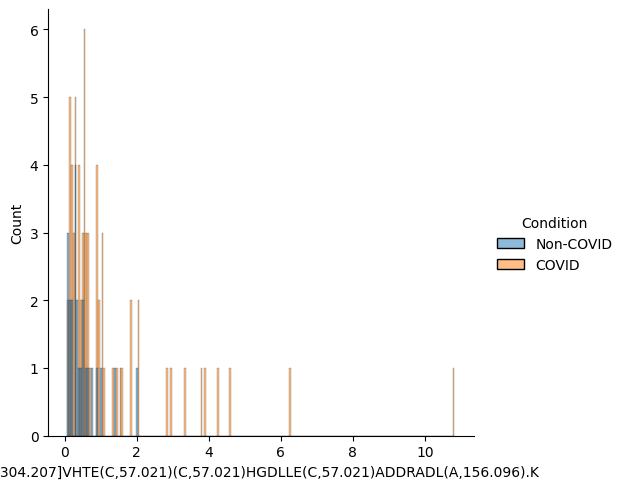

In [6]:
his_data = sns.displot(variants_processed, x='K.[304.207]VHTE(C,57.021)(C,57.021)HGDLLE(C,57.021)ADDRADL(A,156.096).K', hue='Condition', binwidth=0.05)

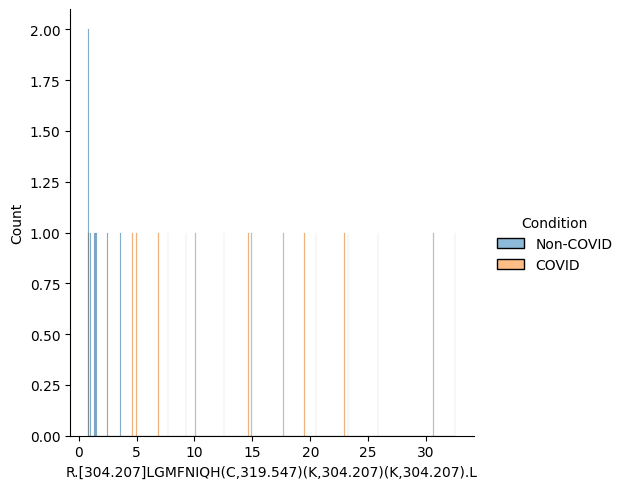

In [7]:
his_data = sns.displot(variants_processed, x='R.[304.207]LGMFNIQH(C,319.547)(K,304.207)(K,304.207).L', hue='Condition', binwidth=0.05)

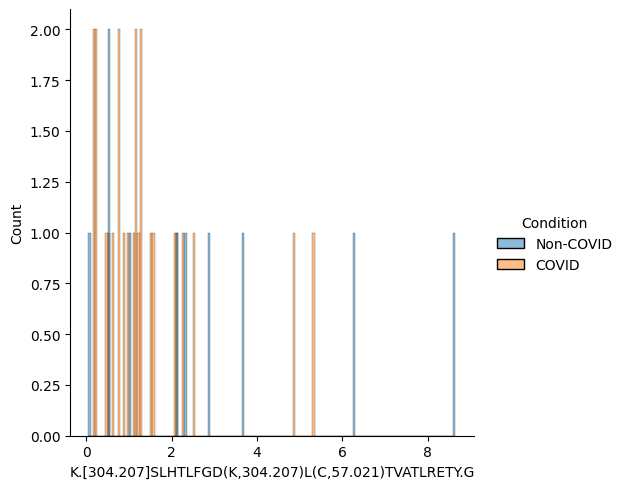

In [8]:
his_data = sns.displot(variants_processed, x='K.[304.207]SLHTLFGD(K,304.207)L(C,57.021)TVATLRETY.G', hue='Condition', binwidth=0.05)

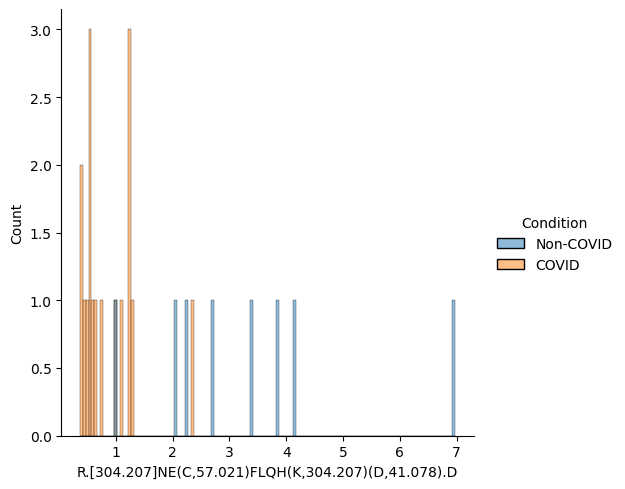

In [9]:
his_data = sns.displot(variants_processed, x='R.[304.207]NE(C,57.021)FLQH(K,304.207)(D,41.078).D', hue='Condition', binwidth=0.05)

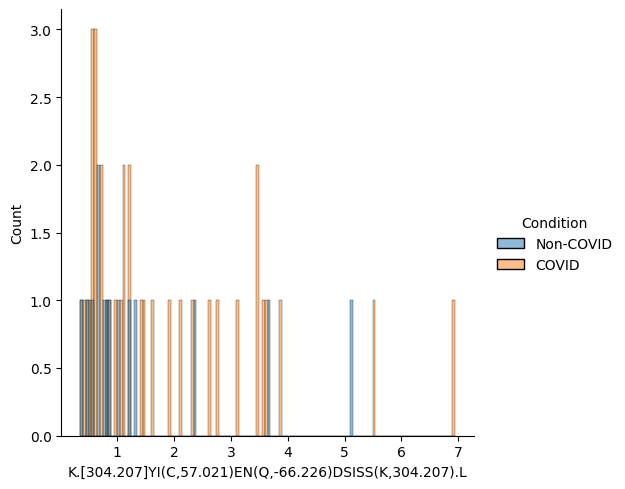

In [10]:
his_data = sns.displot(variants_processed, x='K.[304.207]YI(C,57.021)EN(Q,-66.226)DSISS(K,304.207).L', hue='Condition', binwidth=0.05)

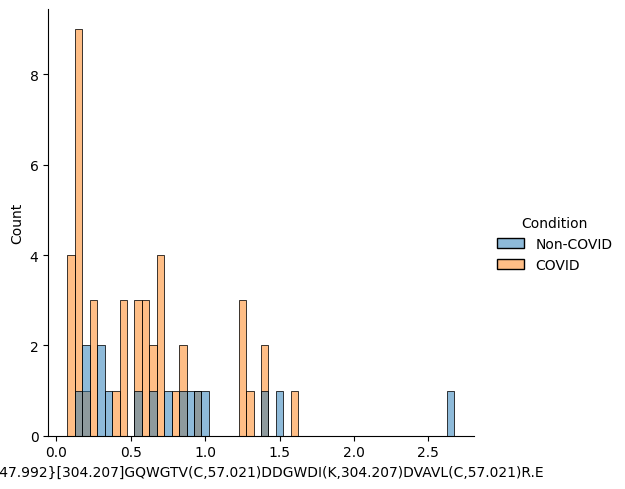

In [11]:
his_data = sns.displot(variants_processed, x='K.{47.992}[304.207]GQWGTV(C,57.021)DDGWDI(K,304.207)DVAVL(C,57.021)R.E', hue='Condition', binwidth=0.05)

In [12]:
# drop patient group index
for index in variants_processed.index:
    if 'Patient-group' in index:
        variants_processed.drop(index, inplace=True)
# drop empty and norm index
variants_processed.drop(['_dyn_#Empty.Empty.Empty..Empty.1_intensity_for_peptide_variant', '_dyn_#Norm.Norm.Norm..Norm.1_intensity_for_peptide_variant'], inplace=True)

KeyError: "['_dyn_#Empty.Empty.Empty..Empty.1_intensity_for_peptide_variant', '_dyn_#Norm.Norm.Norm..Norm.1_intensity_for_peptide_variant'] not found in axis"

In [ ]:
variants_processed

Peptide,"K.[304.207]GARLIPEMDQIFTEVEMTTLE(K,304.207).V","I.[304.207]FTEVEMTTLE(K,304.207).V",K.[304.207]LYQPEYQEVSTEEQR.E,"K.[304.207]AANSLEAFIFETQD(K,304.207).L","R.[304.207]YSHDF(N,-56.985)FH.I","R.[304.207](P,143.096)SV(C,57.021)REAGPQAHMQQVTSSL(K,304.207).G",K.[304.207]QGSTGEEFHFQTGGR.D,"K.[304.207]HGTDDGVVW(M,15.995)NW(K,304.207).G","K.[304.207](H,100.027)GTDDGVVWMNW(K,304.207).G","K.[304.207]H(G,304.213)TDDGVVWMNW(K,304.207).G",...,"K.[304.207]YLGEE(Y,-21.617)V(K,304.207).A","K.[304.207]YLGEE(Y,-57.005)V(K,304.207).A","K.[304.207]YLGEE(Y,-58.064)V(K,304.207).A","K.[304.207]YLGEE(Y,-60.599)V(K,304.207).A","K.[304.207]YLGEE(Y,-63.608)V(K,304.207).A","K.[304.207]YLGE(E,-68.078)YV(K,304.207).A","K.[304.207]YL(G,55.921)EEYV(K,304.207).A","K.{187.018}[304.207]YLGEEYV(K,304.207).A","R.[304.207]NTYE(K,361.237)YLGEEYV(K,304.207).A","K.[304.207]YLGE(E,125.898)YV(K,304.207).A"
_dyn_#Healthy.HC1.Healthy..HC1.1_intensity_for_peptide_variant,NaN,NaN,0.935916,NaN,NaN,NaN,NaN,NaN,NaN,0.288821,...,NaN,1.958825,NaN,NaN,1.174198,NaN,NaN,NaN,0.370040,NaN
_dyn_#Healthy.HC10.Healthy..HC10.1_intensity_for_peptide_variant,6.645649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026024,...,NaN,2.544654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_dyn_#Healthy.HC12.Healthy..HC12.1_intensity_for_peptide_variant,3.391896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009033,...,NaN,0.913199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_dyn_#Healthy.HC13.Healthy..HC13.1_intensity_for_peptide_variant,1.919552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028415,...,NaN,1.035449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_dyn_#Healthy.HC17.Healthy..HC17.1_intensity_for_peptide_variant,NaN,NaN,0.286530,1.259306,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.110892,0.814550,0.863862,NaN,NaN,NaN,NaN,0.791905,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_dyn_#Symptomatic-non-COVID-19.JBDZ5.Symptomatic-non-COVID-19..JBDZ5.1_intensity_for_peptide_variant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.57320,0.701235,0.036201,...,NaN,0.092766,NaN,NaN,NaN,NaN,NaN,0.202111,NaN,0.207968
_dyn_#Symptomatic-non-COVID-19.JBDZ6.Symptomatic-non-COVID-19..JBDZ6.1_intensity_for_peptide_variant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.62278,0.613630,0.020799,...,NaN,0.189781,NaN,NaN,NaN,NaN,NaN,0.143696,NaN,0.118712
_dyn_#Symptomatic-non-COVID-19.JBDZ7.Symptomatic-non-COVID-19..JBDZ7.1_intensity_for_peptide_variant,NaN,0.435434,0.200232,NaN,NaN,NaN,NaN,NaN,NaN,0.061746,...,NaN,0.247039,0.298399,NaN,NaN,0.670534,0.304344,NaN,NaN,NaN
_dyn_#Symptomatic-non-COVID-19.JBDZ8.Symptomatic-non-COVID-19..JBDZ8.1_intensity_for_peptide_variant,NaN,0.736280,0.170478,NaN,NaN,NaN,NaN,NaN,NaN,0.074855,...,NaN,0.246862,0.192796,NaN,NaN,1.330314,0.532133,NaN,NaN,NaN


## Missing Value Handling

In [ ]:
# find that there are columns with all NaN values, remove those columns
all_nan_columns = variants_processed.columns[variants_processed.isna().all()].tolist()
variants_processed = variants_processed.drop(columns=all_nan_columns)

### Fill the NaN values with mean values

In [ ]:
# calculate the mean value of each column
column_means = variants_processed.mean()

# replace NaN values with the column mean values
variants_processed_mean = variants_processed.fillna(column_means)

variants_processed_mean

Peptide,"K.[304.207]GARLIPEMDQIFTEVEMTTLE(K,304.207).V","I.[304.207]FTEVEMTTLE(K,304.207).V",K.[304.207]LYQPEYQEVSTEEQR.E,"K.[304.207]AANSLEAFIFETQD(K,304.207).L","R.[304.207]YSHDF(N,-56.985)FH.I","R.[304.207](P,143.096)SV(C,57.021)REAGPQAHMQQVTSSL(K,304.207).G",K.[304.207]QGSTGEEFHFQTGGR.D,"K.[304.207]HGTDDGVVW(M,15.995)NW(K,304.207).G","K.[304.207](H,100.027)GTDDGVVWMNW(K,304.207).G","K.[304.207]H(G,304.213)TDDGVVWMNW(K,304.207).G",...,"K.[304.207]YLGEE(Y,-21.617)V(K,304.207).A","K.[304.207]YLGEE(Y,-57.005)V(K,304.207).A","K.[304.207]YLGEE(Y,-58.064)V(K,304.207).A","K.[304.207]YLGEE(Y,-60.599)V(K,304.207).A","K.[304.207]YLGEE(Y,-63.608)V(K,304.207).A","K.[304.207]YLGE(E,-68.078)YV(K,304.207).A","K.[304.207]YL(G,55.921)EEYV(K,304.207).A","K.{187.018}[304.207]YLGEEYV(K,304.207).A","R.[304.207]NTYE(K,361.237)YLGEEYV(K,304.207).A","K.[304.207]YLGE(E,125.898)YV(K,304.207).A"
_dyn_#Healthy.HC1.Healthy..HC1.1_intensity_for_peptide_variant,2.713450,0.650282,0.935916,0.733141,1.588371,1.49987,0.514454,1.181655,4.884023,0.288821,...,1.035469,1.958825,0.497285,0.845842,1.174198,0.948573,0.629979,0.568964,0.370040,0.625529
_dyn_#Healthy.HC10.Healthy..HC10.1_intensity_for_peptide_variant,6.645649,0.650282,0.362724,0.733141,1.588371,1.49987,0.514454,1.181655,4.884023,0.026024,...,1.035469,2.544654,0.497285,0.845842,0.773073,0.948573,0.629979,0.568964,0.619008,0.625529
_dyn_#Healthy.HC12.Healthy..HC12.1_intensity_for_peptide_variant,3.391896,0.650282,0.362724,0.733141,1.588371,1.49987,0.514454,1.181655,4.884023,0.009033,...,1.035469,0.913199,0.497285,0.845842,0.773073,0.948573,0.629979,0.568964,0.619008,0.625529
_dyn_#Healthy.HC13.Healthy..HC13.1_intensity_for_peptide_variant,1.919552,0.650282,0.362724,0.733141,1.588371,1.49987,0.514454,1.181655,4.884023,0.028415,...,1.035469,1.035449,0.497285,0.845842,0.773073,0.948573,0.629979,0.568964,0.619008,0.625529
_dyn_#Healthy.HC17.Healthy..HC17.1_intensity_for_peptide_variant,2.713450,0.650282,0.286530,1.259306,1.588371,1.49987,0.514454,1.181655,4.884023,0.246002,...,1.035469,0.110892,0.814550,0.863862,0.773073,0.948573,0.629979,0.568964,0.791905,0.625529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_dyn_#Symptomatic-non-COVID-19.JBDZ5.Symptomatic-non-COVID-19..JBDZ5.1_intensity_for_peptide_variant,2.713450,0.650282,0.362724,0.733141,1.588371,1.49987,0.514454,0.573200,0.701235,0.036201,...,1.035469,0.092766,0.497285,0.845842,0.773073,0.948573,0.629979,0.202111,0.619008,0.207968
_dyn_#Symptomatic-non-COVID-19.JBDZ6.Symptomatic-non-COVID-19..JBDZ6.1_intensity_for_peptide_variant,2.713450,0.650282,0.362724,0.733141,1.588371,1.49987,0.514454,0.622780,0.613630,0.020799,...,1.035469,0.189781,0.497285,0.845842,0.773073,0.948573,0.629979,0.143696,0.619008,0.118712
_dyn_#Symptomatic-non-COVID-19.JBDZ7.Symptomatic-non-COVID-19..JBDZ7.1_intensity_for_peptide_variant,2.713450,0.435434,0.200232,0.733141,1.588371,1.49987,0.514454,1.181655,4.884023,0.061746,...,1.035469,0.247039,0.298399,0.845842,0.773073,0.670534,0.304344,0.568964,0.619008,0.625529
_dyn_#Symptomatic-non-COVID-19.JBDZ8.Symptomatic-non-COVID-19..JBDZ8.1_intensity_for_peptide_variant,2.713450,0.736280,0.170478,0.733141,1.588371,1.49987,0.514454,1.181655,4.884023,0.074855,...,1.035469,0.246862,0.192796,0.845842,0.773073,1.330314,0.532133,0.568964,0.619008,0.625529


### Fill with KNN

In [ ]:
from sklearn.impute import KNNImputer

# create a KNN imputer with a specific number of neighbors (e.g., 3)
imputer = KNNImputer(n_neighbors=3)

# fit the imputer on the dataset and transform the data
variants_imputed = imputer.fit_transform(variants_processed)

print("Original DataFrame shape:", variants_processed.shape)
print("Imputed array shape:", variants_imputed.shape)

Original DataFrame shape: (86, 100941)
Imputed array shape: (86, 100941)


In [ ]:
# convert the resulting NumPy array back to a DataFrame
variants_processed_knn = pd.DataFrame(variants_imputed, columns=variants_processed.columns, index=variants_processed.index)
variants_processed_knn

Peptide,"K.[304.207]GARLIPEMDQIFTEVEMTTLE(K,304.207).V","I.[304.207]FTEVEMTTLE(K,304.207).V",K.[304.207]LYQPEYQEVSTEEQR.E,"K.[304.207]AANSLEAFIFETQD(K,304.207).L","R.[304.207]YSHDF(N,-56.985)FH.I","R.[304.207](P,143.096)SV(C,57.021)REAGPQAHMQQVTSSL(K,304.207).G",K.[304.207]QGSTGEEFHFQTGGR.D,"K.[304.207]HGTDDGVVW(M,15.995)NW(K,304.207).G","K.[304.207](H,100.027)GTDDGVVWMNW(K,304.207).G","K.[304.207]H(G,304.213)TDDGVVWMNW(K,304.207).G",...,"K.[304.207]YLGEE(Y,-21.617)V(K,304.207).A","K.[304.207]YLGEE(Y,-57.005)V(K,304.207).A","K.[304.207]YLGEE(Y,-58.064)V(K,304.207).A","K.[304.207]YLGEE(Y,-60.599)V(K,304.207).A","K.[304.207]YLGEE(Y,-63.608)V(K,304.207).A","K.[304.207]YLGE(E,-68.078)YV(K,304.207).A","K.[304.207]YL(G,55.921)EEYV(K,304.207).A","K.{187.018}[304.207]YLGEEYV(K,304.207).A","R.[304.207]NTYE(K,361.237)YLGEEYV(K,304.207).A","K.[304.207]YLGE(E,125.898)YV(K,304.207).A"
_dyn_#Healthy.HC1.Healthy..HC1.1_intensity_for_peptide_variant,1.997445,0.726880,0.935916,0.965174,0.473157,0.711157,0.549654,0.890973,0.810454,0.288821,...,1.106025,1.958825,0.279523,0.901467,1.174198,1.121086,0.467932,0.289793,0.370040,0.328607
_dyn_#Healthy.HC10.Healthy..HC10.1_intensity_for_peptide_variant,6.645649,0.746970,0.649764,0.755324,0.473157,3.609736,0.549654,0.985358,0.907773,0.026024,...,1.106025,2.544654,0.472608,0.910142,0.936809,1.079240,0.473626,0.307097,0.739292,0.356257
_dyn_#Healthy.HC12.Healthy..HC12.1_intensity_for_peptide_variant,3.391896,0.726880,0.173983,0.718604,0.379743,3.449393,0.549654,0.890973,0.810454,0.009033,...,1.106025,0.913199,0.279523,0.910142,0.936809,1.121086,0.467932,0.289793,0.756027,0.328607
_dyn_#Healthy.HC13.Healthy..HC13.1_intensity_for_peptide_variant,1.919552,0.726880,0.173983,0.718604,0.193850,3.609736,0.549654,0.890973,0.810454,0.028415,...,1.106025,1.035449,0.279523,0.910142,0.936809,1.121086,0.467932,0.289793,0.756027,0.328607
_dyn_#Healthy.HC17.Healthy..HC17.1_intensity_for_peptide_variant,2.074571,0.668505,0.286530,1.259306,0.169229,0.711157,0.549654,0.985358,0.907773,0.395844,...,1.106025,0.110892,0.814550,0.863862,0.936809,1.147839,0.773880,0.695035,0.791905,0.606335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_dyn_#Symptomatic-non-COVID-19.JBDZ5.Symptomatic-non-COVID-19..JBDZ5.1_intensity_for_peptide_variant,1.997445,0.626598,0.183902,0.755324,0.384665,3.609736,0.559469,0.573200,0.701235,0.036201,...,1.106025,0.092766,0.314724,0.835776,0.936809,0.901160,0.392002,0.202111,0.496706,0.207968
_dyn_#Symptomatic-non-COVID-19.JBDZ6.Symptomatic-non-COVID-19..JBDZ6.1_intensity_for_peptide_variant,1.997445,0.626598,0.183902,0.755324,0.169229,0.711157,0.559469,0.622780,0.613630,0.020799,...,1.106025,0.189781,0.314724,0.835776,0.936809,0.901160,0.392002,0.143696,0.756027,0.118712
_dyn_#Symptomatic-non-COVID-19.JBDZ7.Symptomatic-non-COVID-19..JBDZ7.1_intensity_for_peptide_variant,1.997445,0.435434,0.200232,0.687507,0.355122,0.711157,0.545439,0.746761,0.875921,0.061746,...,0.817496,0.247039,0.298399,0.910142,0.936809,0.670534,0.304344,0.211482,0.496706,0.224504
_dyn_#Symptomatic-non-COVID-19.JBDZ8.Symptomatic-non-COVID-19..JBDZ8.1_intensity_for_peptide_variant,1.997445,0.736280,0.170478,0.687507,0.355122,0.711157,0.549654,0.756017,0.770144,0.074855,...,1.106025,0.246862,0.192796,0.901467,0.936809,1.330314,0.532133,0.275352,0.496706,0.274578


## Feature Selection
### Convert Classes to '1(COVID)' and '0(non-COVID)'

In [ ]:
def convert(df):
    for index in df.index:
        if 'non-COVID-19' in index or 'Healthy' in index:
            df.rename(index={index: 0}, inplace=True)
        else:
            df.rename(index={index: 1}, inplace=True)


def prediction_to_string(prediction):
    if prediction == 0:
        return 'non-COVID-19'
    elif prediction == 1:
        return 'COVID-19'
    else:
        return 'Unknown' + str(prediction)

In [ ]:
convert(variants_processed_knn)
convert(variants_processed_mean)

In [ ]:
variants_processed_knn.reset_index(inplace=True)
variants_processed_knn.rename_axis("id", axis=1, inplace=True)
variants_processed_knn.rename(columns={'index':'Peptide'}, inplace=True)

variants_processed_mean.reset_index(inplace=True)
variants_processed_mean.rename_axis("id", axis=1, inplace=True)
variants_processed_mean.rename(columns={'index':'Peptide'}, inplace=True)

In [ ]:
variants_processed_knn

id,Peptide,"K.[304.207]GARLIPEMDQIFTEVEMTTLE(K,304.207).V","I.[304.207]FTEVEMTTLE(K,304.207).V",K.[304.207]LYQPEYQEVSTEEQR.E,"K.[304.207]AANSLEAFIFETQD(K,304.207).L","R.[304.207]YSHDF(N,-56.985)FH.I","R.[304.207](P,143.096)SV(C,57.021)REAGPQAHMQQVTSSL(K,304.207).G",K.[304.207]QGSTGEEFHFQTGGR.D,"K.[304.207]HGTDDGVVW(M,15.995)NW(K,304.207).G","K.[304.207](H,100.027)GTDDGVVWMNW(K,304.207).G",...,"K.[304.207]YLGEE(Y,-21.617)V(K,304.207).A","K.[304.207]YLGEE(Y,-57.005)V(K,304.207).A","K.[304.207]YLGEE(Y,-58.064)V(K,304.207).A","K.[304.207]YLGEE(Y,-60.599)V(K,304.207).A","K.[304.207]YLGEE(Y,-63.608)V(K,304.207).A","K.[304.207]YLGE(E,-68.078)YV(K,304.207).A","K.[304.207]YL(G,55.921)EEYV(K,304.207).A","K.{187.018}[304.207]YLGEEYV(K,304.207).A","R.[304.207]NTYE(K,361.237)YLGEEYV(K,304.207).A","K.[304.207]YLGE(E,125.898)YV(K,304.207).A"
0,0,1.997445,0.726880,0.935916,0.965174,0.473157,0.711157,0.549654,0.890973,0.810454,...,1.106025,1.958825,0.279523,0.901467,1.174198,1.121086,0.467932,0.289793,0.370040,0.328607
1,0,6.645649,0.746970,0.649764,0.755324,0.473157,3.609736,0.549654,0.985358,0.907773,...,1.106025,2.544654,0.472608,0.910142,0.936809,1.079240,0.473626,0.307097,0.739292,0.356257
2,0,3.391896,0.726880,0.173983,0.718604,0.379743,3.449393,0.549654,0.890973,0.810454,...,1.106025,0.913199,0.279523,0.910142,0.936809,1.121086,0.467932,0.289793,0.756027,0.328607
3,0,1.919552,0.726880,0.173983,0.718604,0.193850,3.609736,0.549654,0.890973,0.810454,...,1.106025,1.035449,0.279523,0.910142,0.936809,1.121086,0.467932,0.289793,0.756027,0.328607
4,0,2.074571,0.668505,0.286530,1.259306,0.169229,0.711157,0.549654,0.985358,0.907773,...,1.106025,0.110892,0.814550,0.863862,0.936809,1.147839,0.773880,0.695035,0.791905,0.606335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,0,1.997445,0.626598,0.183902,0.755324,0.384665,3.609736,0.559469,0.573200,0.701235,...,1.106025,0.092766,0.314724,0.835776,0.936809,0.901160,0.392002,0.202111,0.496706,0.207968
82,0,1.997445,0.626598,0.183902,0.755324,0.169229,0.711157,0.559469,0.622780,0.613630,...,1.106025,0.189781,0.314724,0.835776,0.936809,0.901160,0.392002,0.143696,0.756027,0.118712
83,0,1.997445,0.435434,0.200232,0.687507,0.355122,0.711157,0.545439,0.746761,0.875921,...,0.817496,0.247039,0.298399,0.910142,0.936809,0.670534,0.304344,0.211482,0.496706,0.224504
84,0,1.997445,0.736280,0.170478,0.687507,0.355122,0.711157,0.549654,0.756017,0.770144,...,1.106025,0.246862,0.192796,0.901467,0.936809,1.330314,0.532133,0.275352,0.496706,0.274578


In [ ]:
variants_processed_mean

id,Peptide,"K.[304.207]GARLIPEMDQIFTEVEMTTLE(K,304.207).V","I.[304.207]FTEVEMTTLE(K,304.207).V",K.[304.207]LYQPEYQEVSTEEQR.E,"K.[304.207]AANSLEAFIFETQD(K,304.207).L","R.[304.207]YSHDF(N,-56.985)FH.I","R.[304.207](P,143.096)SV(C,57.021)REAGPQAHMQQVTSSL(K,304.207).G",K.[304.207]QGSTGEEFHFQTGGR.D,"K.[304.207]HGTDDGVVW(M,15.995)NW(K,304.207).G","K.[304.207](H,100.027)GTDDGVVWMNW(K,304.207).G",...,"K.[304.207]YLGEE(Y,-21.617)V(K,304.207).A","K.[304.207]YLGEE(Y,-57.005)V(K,304.207).A","K.[304.207]YLGEE(Y,-58.064)V(K,304.207).A","K.[304.207]YLGEE(Y,-60.599)V(K,304.207).A","K.[304.207]YLGEE(Y,-63.608)V(K,304.207).A","K.[304.207]YLGE(E,-68.078)YV(K,304.207).A","K.[304.207]YL(G,55.921)EEYV(K,304.207).A","K.{187.018}[304.207]YLGEEYV(K,304.207).A","R.[304.207]NTYE(K,361.237)YLGEEYV(K,304.207).A","K.[304.207]YLGE(E,125.898)YV(K,304.207).A"
0,0,2.713450,0.650282,0.935916,0.733141,1.588371,1.49987,0.514454,1.181655,4.884023,...,1.035469,1.958825,0.497285,0.845842,1.174198,0.948573,0.629979,0.568964,0.370040,0.625529
1,0,6.645649,0.650282,0.362724,0.733141,1.588371,1.49987,0.514454,1.181655,4.884023,...,1.035469,2.544654,0.497285,0.845842,0.773073,0.948573,0.629979,0.568964,0.619008,0.625529
2,0,3.391896,0.650282,0.362724,0.733141,1.588371,1.49987,0.514454,1.181655,4.884023,...,1.035469,0.913199,0.497285,0.845842,0.773073,0.948573,0.629979,0.568964,0.619008,0.625529
3,0,1.919552,0.650282,0.362724,0.733141,1.588371,1.49987,0.514454,1.181655,4.884023,...,1.035469,1.035449,0.497285,0.845842,0.773073,0.948573,0.629979,0.568964,0.619008,0.625529
4,0,2.713450,0.650282,0.286530,1.259306,1.588371,1.49987,0.514454,1.181655,4.884023,...,1.035469,0.110892,0.814550,0.863862,0.773073,0.948573,0.629979,0.568964,0.791905,0.625529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,0,2.713450,0.650282,0.362724,0.733141,1.588371,1.49987,0.514454,0.573200,0.701235,...,1.035469,0.092766,0.497285,0.845842,0.773073,0.948573,0.629979,0.202111,0.619008,0.207968
82,0,2.713450,0.650282,0.362724,0.733141,1.588371,1.49987,0.514454,0.622780,0.613630,...,1.035469,0.189781,0.497285,0.845842,0.773073,0.948573,0.629979,0.143696,0.619008,0.118712
83,0,2.713450,0.435434,0.200232,0.733141,1.588371,1.49987,0.514454,1.181655,4.884023,...,1.035469,0.247039,0.298399,0.845842,0.773073,0.670534,0.304344,0.568964,0.619008,0.625529
84,0,2.713450,0.736280,0.170478,0.733141,1.588371,1.49987,0.514454,1.181655,4.884023,...,1.035469,0.246862,0.192796,0.845842,0.773073,1.330314,0.532133,0.568964,0.619008,0.625529


In [ ]:
# save data to pickle
variants_processed_knn.to_pickle('data/variants_processed_knn.pkl')
variants_processed_mean.to_pickle('data/variants_processed_mean.pkl')

# load data from pickle (command out only if you want to load data from pickle and skip the above steps)
# variants_processed_knn = pd.read_pickle('data/variants_processed_knn.pkl')
# variants_processed_mean = pd.read_pickle('data/variants_processed_mean.pkl')

### Feature Selection Category
- PCA
- Filter: Correlation
- Wrapper: Random Forest
- Embedded: N/A

### PCA (Principle Component Analysis)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
def pca(df):
    dfc = df.copy()
    X, y = dfc.drop('Peptide', axis=1), df['Peptide']

    # PCA performs best with a normalized feature set
    sc = StandardScaler()
    X = sc.fit_transform(X)

    # apply PCA
    pca = PCA()
    # pca = PCA(n_components=1) - use 1 principle component for the training
    X = pca.fit_transform(X)

    # build df from y and new X that has same format as other section
    X = pd.DataFrame(X)
    X = pd.concat([y, X], axis=1)
    X.rename_axis("id", axis=1, inplace=True)
    X.rename(columns={'index': 'Peptide'}, inplace=True)

    return X

In [ ]:
knn_PCA = pca(variants_processed_knn)
knn_PCA

id,Peptide,0,1,2,3,4,5,6,7,8,...,76,77,78,79,80,81,82,83,84,85
0,0,-79.287590,89.273531,110.592578,-115.878461,129.232690,-3.230741,-2.792263,-48.651878,-25.963711,...,-1.823111,-7.086074,-2.067724,-0.547581,-7.024168,0.980082,-2.705478,-1.207988,2.219813,1.018191e-13
1,0,-121.922512,128.889970,101.515777,43.570669,70.562957,-3.889356,0.985809,-36.352940,288.477459,...,1.053203,-3.820085,-0.830431,-0.407310,0.339042,-1.927418,-1.089372,3.214530,-1.956667,1.018191e-13
2,0,-170.731633,-0.315470,18.858771,12.287312,15.163266,0.385951,9.439807,7.038210,64.094503,...,24.671422,1.711552,-7.776954,-9.714854,20.786977,-40.551418,7.569031,-31.697420,16.979279,1.018191e-13
3,0,-171.706526,13.997274,21.360421,14.522818,17.072748,-1.397039,22.341146,-8.660419,75.350640,...,-20.619740,17.064763,0.623672,9.226162,-13.549463,14.753685,5.603599,-12.996467,14.829431,1.018191e-13
4,0,64.481189,225.644200,6.217792,-62.364665,-21.580041,-73.474675,83.009121,-59.586206,-51.762529,...,-4.633598,5.086052,4.535601,-1.314390,4.715826,-5.990200,1.246853,1.950300,0.002589,1.018191e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,0,-155.167618,-53.214710,-27.788181,12.122796,3.592113,-29.751866,7.556619,-4.180921,24.600231,...,-4.591843,-33.788411,13.877098,-8.738274,-12.311252,2.017230,7.524482,-3.986643,-3.299200,1.018191e-13
82,0,-157.076207,-61.090567,-36.083341,4.866609,3.417393,-21.392422,27.550575,5.774203,-11.120073,...,-4.592908,2.626547,-2.506042,1.081969,2.029108,-1.749987,1.528416,-1.168192,-0.043619,1.018191e-13
83,0,-138.237467,-83.261998,-20.662037,-3.958527,-12.647301,-19.995568,26.733405,-30.470622,-34.050924,...,-8.839032,-2.156158,12.957081,2.108485,42.352569,-14.548968,5.131667,7.786705,-16.822328,1.018191e-13
84,0,-168.059692,-4.760521,29.370980,14.116543,15.121284,-13.150148,59.089165,-12.418724,-35.165671,...,-9.373088,1.369001,-13.981127,-3.434786,-29.108221,-15.849201,-26.037316,-16.984918,-25.736459,1.018191e-13


In [ ]:
mean_PCA = pca(variants_processed_mean)
mean_PCA

id,Peptide,0,1,2,3,4,5,6,7,8,...,76,77,78,79,80,81,82,83,84,85
0,0,8.103209,-42.511055,-93.214534,197.903815,-0.257616,-24.576959,-16.414909,-65.034726,-25.923800,...,-0.462216,0.199812,0.176249,0.294838,0.057363,0.123862,0.077280,-0.113352,-0.050064,8.426312e-14
1,0,15.559782,-5.357789,-16.489895,10.898745,16.103506,-106.505372,247.156391,-152.727237,313.481473,...,11.773993,0.448545,1.097201,-5.352531,1.158673,-5.709074,1.441523,-0.727822,-5.567750,8.426312e-14
2,0,-99.844958,23.105279,2.505970,-23.207546,-16.159466,-20.926172,46.861483,-27.260579,45.368331,...,-60.439884,4.262788,4.820964,0.151800,-14.034935,-50.015677,-44.255639,-0.506415,12.902605,8.426312e-14
3,0,-93.114470,21.310610,0.458267,-19.600016,-15.870142,-22.382712,54.656893,-32.105521,58.961763,...,-15.104485,11.935426,9.237288,-25.664157,1.924922,5.452659,-0.191396,1.273030,4.019418,8.426312e-14
4,0,120.278163,-160.400984,-101.742996,-103.797665,-60.661884,-18.314424,29.532293,-0.269577,-13.968255,...,-0.086232,-0.273448,0.229827,-0.095018,0.194808,0.063194,-0.081688,-0.012929,0.061959,8.426312e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,0,-104.575831,31.108373,6.090652,-28.915688,-19.855294,-9.004257,-18.718212,18.280754,-51.679732,...,1.442604,-3.431178,6.135651,-0.676174,-2.126368,0.278004,-0.414061,-0.030283,0.097159,8.426312e-14
82,0,-110.564740,33.245410,6.094241,-29.926952,-22.765429,0.757931,-15.532731,27.314581,-51.441075,...,-1.593675,1.198505,-9.020112,-1.293583,-0.180400,-0.204776,0.055723,-0.014980,0.127220,8.426312e-14
83,0,-105.363106,23.461173,3.885811,-27.591237,-22.870807,-6.657633,17.781791,0.789338,-10.485797,...,-1.527585,-18.304569,0.404135,-8.411191,-4.677845,1.529460,2.180694,4.215645,0.551182,8.426312e-14
84,0,-94.181889,21.741470,3.425461,-24.879761,-17.568375,-20.974443,30.334044,-4.246475,-5.190734,...,5.730967,-45.118222,3.484136,-18.962191,-29.097846,4.039554,2.238795,8.251754,-0.225558,8.426312e-14


In [ ]:
# save data to pickle
pd.DataFrame(knn_PCA).to_pickle('data/knn_PCA.pkl')
pd.DataFrame(mean_PCA).to_pickle('data/mean_PCA.pkl')

### Correlation

In [ ]:
def correlation(df):
    corr_scores = {}
    for i in range(1, len(df.iloc[0])):
        scores = []
        for j in range(1, len(df.iloc[0])):
            if i != j:
                scores.append(np.corrcoef(df.iloc[:,i].tolist(), df.iloc[:,j].tolist()))
        corr_scores[df.columns[i]] = np.mean(np.array(scores))
    best_subset = []
    for feat in corr_scores:
        if corr_scores[feat] > 0.5:
            best_subset.append(feat)
    return best_subset

In [ ]:
best_subset_knn = correlation(variants_processed_knn)
best_subset_mean = correlation(variants_processed_mean)

In [ ]:
pd.DataFrame(best_subset_knn).to_pickle('data/best_subset_knn.pkl')
pd.DataFrame(best_subset_mean).to_pickle('data/best_subset_mean.pkl')

### Random Forest (Feature Selection)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
def rrf(df):
    dfc = df.copy()
    X, y = dfc.drop('Peptide', axis=1), dfc['Peptide']

    # model fitting
    sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
    sel.fit(X, y)

    # select features that are important
    selected_feat = X.columns[(sel.get_support())]

    dfc = dfc[selected_feat]
    dfc.insert(0, 'Peptide', y)
    dfc.rename_axis("id", axis=1, inplace=True)
    dfc.rename(columns={'index': 'Peptide'}, inplace=True)

    return dfc

In [ ]:
selected_features_knn = rrf(variants_processed_knn)
selected_features_knn

id,Peptide,"I.[304.207]FTEVEMTTLE(K,304.207).V","R.[304.207]YYWGGQ(Y,21.988)TWDMA(K,304.207).H","K.[304.207]AHYGGFTVQNE(A,13.217)N(K,304.207).Y","K.[304.207]NY(C,57.021)GL(P,21.985)GEYWLGND(K,304.207).I","K.[304.207]NY(C,57.021)GL(P,37.95)GEYWLGND(K,304.207).I","R.[304.207](K,233.177)PVEEYAN(C,57.021)HLAR.A",K.[304.207]GSSGEAFGSS.V,"G.[304.207]L(N,132.065)L(C,57.021)EPNN(K,304.207)EGYYGYTGAFR.C","R.[304.207]FDEFFSEG(C,39.355)A.P",...,T.[201.066]NFDNDIALVR.L,"K.[304.207]EDTPNSVWE(P,60.917)A(K,304.207).A","K.{302.458}[304.207]FLASVSTVLTS(K,304.207).Y","K.[304.207]EFTPPVQAA(Y,-18.012)Q(K,304.207).V","M.[304.207]VHLTPEE(K,304.207)SAVTALWG(K,304.207)VNVDEVGGEALGR.L","R.{322.752}[304.207]EVVTDQFL(C,57.021).S","R.[304.207](C,57.021)SSNLVLTGS(S,19.027).-",K.[304.207]SLEDLQLTH.N,"R.[304.207](K,508.605)(C,57.021)STSSLLEA(C,57.021)TFR.R","K.[304.207](C,57.021)STSSLLE(A,13.462)(C,57.021)TFR.R"
0,0,0.726880,0.654292,1.227613,0.570997,1.194177,1.096660,0.423681,0.336715,1.236444,...,1.151157,0.789080,0.756543,1.415636,0.334649,0.517294,0.664312,0.184419,0.694580,1.327703
1,0,0.746970,0.641342,1.056985,0.400944,1.273321,0.942694,0.620192,0.351440,1.015127,...,0.944620,0.865911,0.452862,1.468777,0.236100,0.679136,0.767110,0.400963,1.041707,0.438469
2,0,0.726880,0.654292,1.227613,0.570997,1.194177,0.942694,0.549562,0.336715,1.015127,...,0.889566,0.865911,0.756543,1.415636,0.334649,0.679136,0.767110,0.227953,0.694580,0.209267
3,0,0.726880,0.654292,1.227613,0.570997,1.194177,0.942694,0.437827,0.336715,1.015127,...,0.889566,0.865911,0.756543,1.415636,0.334649,0.679136,0.767110,0.195801,0.694580,0.247115
4,0,0.668505,0.641342,1.056985,0.400944,1.273321,0.973285,0.394817,0.732893,1.015127,...,0.546963,0.837768,0.452862,1.156582,0.236100,0.679136,0.767110,0.954656,1.624291,1.039262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,0,0.626598,0.642020,1.430002,0.995818,1.100301,0.643962,1.001419,0.290333,1.015127,...,0.827031,0.830079,1.432649,1.319165,0.572366,0.679136,0.767110,0.184419,0.804514,0.245024
82,0,0.626598,0.806208,0.514830,0.704823,0.796532,0.643962,0.976336,0.298611,1.015127,...,0.889566,0.830079,0.573922,1.319165,0.520308,0.679136,0.767110,0.184419,0.804514,0.256533
83,0,0.435434,0.648133,1.335127,0.725690,1.216282,0.942694,0.976336,0.307122,1.015127,...,0.827031,0.865911,1.250371,0.757514,0.779399,0.679136,0.767110,0.184419,0.675379,0.350688
84,0,0.736280,0.601267,1.142277,0.625279,1.255794,1.096660,1.001419,0.296905,1.015127,...,0.827031,0.789080,0.835781,1.046929,0.346245,0.679136,0.767110,0.184419,0.345577,0.286606


In [ ]:
selected_features_mean = rrf(variants_processed_mean)
selected_features_mean

id,Peptide,"R.[304.207]QQQHL(F,-77.729)GSNVTD(C,57.021)SGNF(C,57.021)LFR.S","R.[304.207]DDTV(C,57.021)LA(K,466.265)LHDR.N","V.[304.207](N,-37.08)DNEEGFFS.A",V.{17.030}[304.207]NDNEEGFF.S,"C.[304.207]L(D,-24.396)GTR(K,304.207)PVEEYAN(C,57.021)HLAR.A","K.[304.207]DYELL(C,109.937)LDGTR.K","R.[304.207]APNHAVVT(R,304.207).K","K.{14.585}[304.207]L(C,57.021)MGSGLNL(C,57.021)EPNN(K,304.207).E","R.[304.207]FDEFFSEG(C,37.351)A.P",...,"R.[304.207]WNP(C,57.021)LEPHR.F","R.[304.207]FFESFGDL(S,197.432)TPDAVMGNP(K,304.207).V","R.{17.028}[304.207]FFESFGDLSTPDAVMGNP(K,304.207).V","R.[304.207]S(C,57.021)DSLNNR.C","R.{78.583}[304.207]EVVTDQFL(C,57.021)SG.T","K.[304.207]T(K,304.207)DLQAI(C,57.021)GIS(C,57.021)DE(L,15.036)SSMVLELR.G","R.[304.207]ISETSLPPD(M,15.995)YE(C,57.021)LR.V","K.[304.207]SLEDLQLTHN(K,304.207).I","K.[304.207](C,239.171)STSSLLEA(C,57.021)TFR.R","S.[205.733]LLEA(C,57.021)TFR.R"
0,0,0.536855,0.373133,1.073651,0.603280,0.351678,0.219130,0.666434,0.547300,0.583761,...,0.486402,4.147823,0.114459,0.387468,1.430537,0.827235,0.431154,0.507879,1.003408,1.572098
1,0,0.178566,0.307530,0.700724,0.456112,1.190758,0.551742,0.466965,1.334791,0.995031,...,0.467145,2.357434,0.518054,0.387468,1.430537,0.827235,0.373598,0.469398,0.674123,0.770714
2,0,0.071118,0.307530,0.351235,0.213677,0.365456,0.217612,0.181978,0.529534,0.494913,...,0.271707,2.357434,0.518054,0.387468,1.430537,0.827235,0.373598,0.411112,0.674123,0.770714
3,0,0.125739,0.307530,0.499011,0.252764,0.566801,0.235899,0.161875,0.593775,0.615803,...,0.279812,2.357434,0.518054,0.387468,1.430537,0.827235,0.373598,0.417492,0.674123,0.770714
4,0,0.421526,0.274341,0.782040,0.771574,0.351678,0.351830,0.557594,0.469491,1.003158,...,0.714004,2.357434,0.476166,0.724236,1.430537,0.827235,0.370932,1.037282,0.674123,0.770714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,0,0.347415,0.071054,0.232320,0.256478,0.186282,0.338814,0.557594,0.413236,0.344793,...,0.061995,2.357434,0.319809,0.043023,0.941203,0.827235,0.065465,0.312183,0.674123,0.241535
82,0,0.347415,0.047730,0.189251,0.246358,0.108277,0.291153,0.557594,0.267591,0.191832,...,0.077366,2.357434,0.171230,0.071929,0.835831,0.827235,0.083705,0.506869,0.674123,0.165443
83,0,0.066099,0.033630,0.282479,0.366786,0.351678,0.057430,0.557594,0.582267,0.151683,...,0.120949,0.896742,0.518054,0.387468,1.430537,0.827235,0.539688,0.141143,0.323214,0.980470
84,0,0.083299,0.033754,0.478739,0.170333,0.351678,0.079003,0.557594,1.190551,0.316395,...,0.195095,5.633229,0.518054,0.387468,1.430537,0.827235,0.614536,0.454263,0.444819,1.458364


In [ ]:
pd.DataFrame(selected_features_knn).to_pickle('data/selected_features_knn.pkl')
pd.DataFrame(selected_features_mean).to_pickle('data/selected_features_mean.pkl')

## Models

In [ ]:
import pandas as pd
# Quick load
# If variable not in memory, load it from pickle
if "variants_processed_knn" not in locals():
    variants_processed_knn = pd.read_pickle('data/variants_processed_knn.pkl')
if "variants_processed_mean" not in locals():
    variants_processed_mean = pd.read_pickle('data/variants_processed_mean.pkl')
if "knn_PCA" not in locals():
    knn_PCA = pd.read_pickle('data/knn_PCA.pkl')
if "mean_PCA" not in locals():
    mean_PCA = pd.read_pickle('data/mean_PCA.pkl')

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
def logistic_regression(df):
    dfc = df.copy()
    X, y = dfc.drop("Peptide", axis=1), df["Peptide"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    lr = LogisticRegression()
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)

    return lr, X_test, y_test, y_pred


def process_logistic_regression(df, data_name):
    lr, X_test, y_test, y_pred = logistic_regression(df)
    print("Accuracy: ", lr.score(X_test, y_test))

    # Merge X_test, y_test, y_pred into one dataframe
    df_result = pd.DataFrame(X_test)
    df_result.insert(0, 'Peptide', y_test)
    df_result.insert(1, 'Peptide_pred', y_pred)
    df_result.rename_axis("id", axis=1, inplace=True)
    df_result.rename(columns={'index': 'Peptide'}, inplace=True)

    # Save to file
    df_result.to_csv('data/logistic_regression-' + data_name + '.csv')
    df_result.to_pickle('data/logistic_regression-' + data_name + '.pkl')
    return lr, df_result

In [ ]:
# variants_processed_knn
lr_knn, df_lr_knn = process_logistic_regression(variants_processed_knn, 'variants_processed_knn')
df_lr_knn

In [ ]:
# variants_processed_mean
lr_mean, df_lr_mean = process_logistic_regression(variants_processed_mean, 'variants_processed_mean')
df_lr_mean

In [ ]:
lr_knn_PCA, df_lr_knn_PCA = process_logistic_regression(knn_PCA, 'knn_PCA')
df_lr_knn_PCA

In [ ]:
lr_mean_PCA, df_lr_mean_PCA = process_logistic_regression(mean_PCA, 'mean_PCA')
df_lr_mean_PCA

### SVM

In [ ]:
from sklearn.svm import SVC
def support_vector_machine(df):
    dfc = df.copy()
    X, y = dfc.drop("Peptide", axis=1), df["Peptide"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    svm = SVC()
    svm.fit(X_train, y_train)

    y_pred = svm.predict(X_test)

    return svm, X_test, y_test, y_pred


def process_svm(df, data_name):
    svm, X_test, y_test, y_pred = support_vector_machine(df)
    print("Accuracy: ", svm.score(X_test, y_test))

    # Merge X_test, y_test, y_pred into one dataframe
    df_result = pd.DataFrame(X_test)
    df_result.insert(0, 'Peptide', y_test)
    df_result.insert(1, 'Peptide_pred', y_pred)
    df_result.rename_axis("id", axis=1, inplace=True)
    df_result.rename(columns={'index': 'Peptide'}, inplace=True)

    # Save to file
    df_result.to_csv('data/svm-' + data_name + '.csv')
    df_result.to_pickle('data/svm-' + data_name + '.pkl')
    return svm, df_result

In [ ]:
svm_knn, df_svm_knn = process_svm(variants_processed_knn, 'variants_processed_knn')
df_svm_knn

In [ ]:
svm_mean, df_svm_mean = process_svm(variants_processed_mean, 'variants_processed_mean')
df_svm_mean

In [ ]:
svm_knn_PCA, df_svm_knn_PCA = process_svm(knn_PCA, 'knn_PCA')
df_svm_knn_PCA

In [ ]:
svm_mean_PCA, df_svm_mean_PCA = process_svm(mean_PCA, 'mean_PCA')
df_svm_mean_PCA